-75.16719270494222


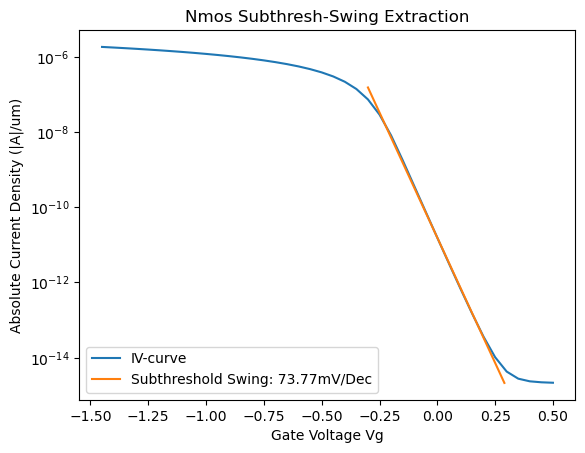

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Find subthreshold swing given low Vd

with open("C:/Users/danny/OneDrive/Documents/Global_Foundaries/1.5um_Data/pmos_data/pmos_1.5_iv_low.txt", 'r') as file:
    lines = [line.rstrip() for line in file][6:]

    voltage = []
    current = []

    for line in lines:
        b, a = line.split("      ")
        voltage.append(float(b))
        current.append(float(a))

    plt.plot(voltage, np.abs(current))

    plt.yscale('log') 

    # Subthreshold Swing Extraction

    #m, b = np.polyfit(voltage[8:13], np.log10(np.abs(current[8:13])), 1)    #nmos
    m, b = np.polyfit(voltage[-12:-6], np.log10(np.abs(current[-12:-6])), 1)    #pmos

    #x_index = np.arange(-0.1, 0.2, 0.01)    #nmos
    x_index = np.arange(-0.3, 0.3, 0.01)    #pmos

    plt.plot(x_index, np.power(10, m*x_index) * np.power(10, b))

    plt.ylabel("Absolute Current Density (|A|/um)")
    plt.xlabel("Gate Voltage Vg")
    plt.title("Nmos Subthresh-Swing Extraction")

    plt.legend(['IV-curve', 'Subthreshold Swing: 73.77mV/Dec'])

    print(1000/m)

plt.show()

1.0233680000000002e-05


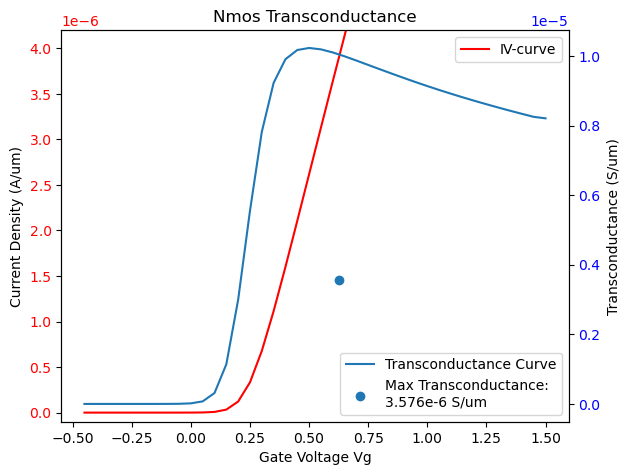

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Find max transconductance given low Vd

with open("C:/Users/danny/OneDrive/Documents/Global_Foundaries/1.0um_Data/nmos_data/nmos_1.0_iv_low.txt", 'r') as file:
    lines = [line.rstrip() for line in file][6:]

    voltage = []
    current = []

    for line in lines:
        b, a = line.split("      ")
        voltage.append(float(b))
        current.append(float(a))

    fig, ax1 = plt.subplots()

    ax1.set_ylabel("Current Density (A/um)")
    ax1.set_xlabel("Gate Voltage Vg")
    ax1.plot(voltage, current, color='red')
    ax1.set_ylim(-1e-7, 4.2e-6)
    ax1.tick_params(axis='y', labelcolor='red')

    # Maximum Transconductance

    transconductance = np.gradient(current, voltage)

    ax2 = ax1.twinx()
    ax2.set_ylabel("Transconductance (S/um)")
    ax2.plot(voltage, transconductance)
    ax2.scatter(0.625, 3.5764e-6)
    ax2.tick_params(axis='y', labelcolor='blue')

    fig.tight_layout()
    ax1.legend(['IV-curve'])
    ax2.legend(['Transconductance Curve', 'Max Transconductance:\n3.576e-6 S/um'], loc=4)
    plt.title("Nmos Transconductance")

    print(np.max(transconductance))

plt.show()

0.22307568719039447


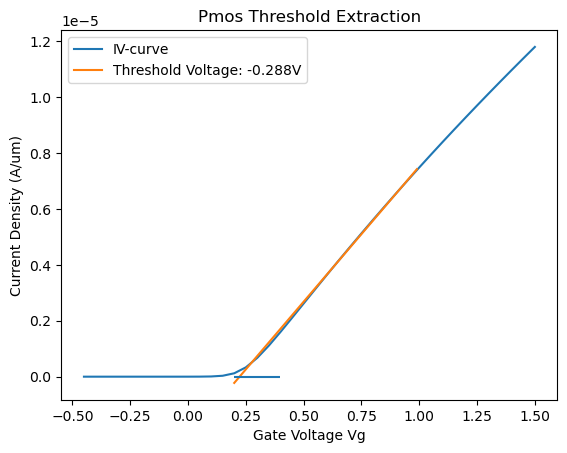

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Find threshold voltage given low Vd

with open("C:/Users/danny/OneDrive/Documents/Global_Foundaries/1.0um_Data/nmos_data/nmos_1.0_iv_low.txt", 'r') as file:
    lines = [line.rstrip() for line in file][6:]

    voltage = []
    current = []

    for line in lines:
        b, a = line.split("      ")
        voltage.append(float(b))
        current.append(float(a))

    plt.plot(voltage, current)

    # Threshold Voltage Extraction

    m, b = np.polyfit(voltage[20:-10], current[20:-10], 1)  #nmos
    #m, b = np.polyfit(voltage[14:-20], current[14:-20], 1)  #pmos

    x_index = np.arange(0.2, 1.0, 0.01)     #nmos
    #x_index = np.arange(-0.8, -0.2, 0.01)   #pmos

    plt.plot(x_index, m*x_index + b)

    plt.hlines(0, 0.2, 0.4)     #nmos
    #plt.hlines(0, -0.4, -0.2)   #pmos

    plt.ylabel("Current Density (A/um)")
    plt.xlabel("Gate Voltage Vg")
    plt.title("Pmos Threshold Extraction")

    plt.legend(['IV-curve', 'Threshold Voltage: -0.288V'])

    print(-b/m)

plt.show()